In [1]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

In [14]:
df = pd.read_csv('../HRC Folder/NewFinal.csv')

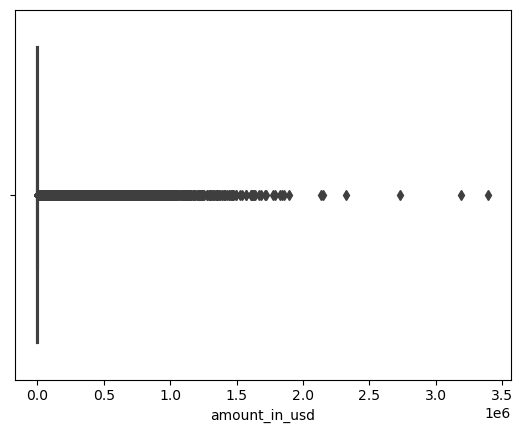

In [15]:
# Q1 Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, 
# discussed in the sessions.
sns.boxplot(x=df['amount_in_usd'])
median = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].mask(df['amount_in_usd'] > 2000000, median)

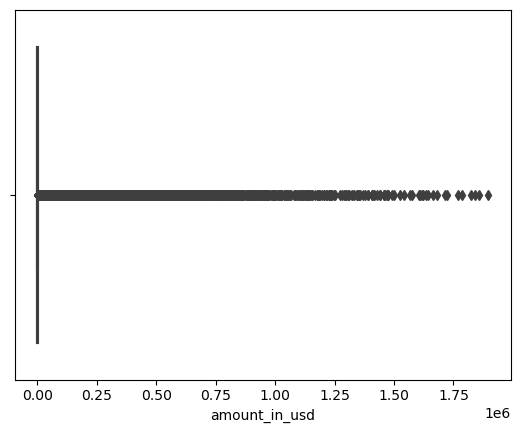

In [16]:
sns.boxplot(x=df['amount_in_usd'])
plt.show()

In [17]:
# Q2 Label encoding or One hot Encoding on all the categorical columns
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)

In [18]:
le = LabelEncoder()
# oneHot = OneHotEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])
    # df[col] = oneHot.fit_transform(df[col])

In [20]:
# Q3 Log Transformations on continuous columns
for col in continuous:
    df[col] = df[col].apply(lambda x: np.log(x))

In [21]:
# Q4 Try to extract new features by grouping existing columns
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,2.034665,1.763904,609429,141,2.558460
1,2.034728,1.795583,723167,129,2.474524
2,2.034790,1.791164,594668,116,2.497953
3,2.034852,1.769869,667986,124,2.425906
4,2.034914,1.764357,806552,137,2.492495
...,...,...,...,...,...
2406,2.129798,1.796322,613023,143,2.591628
2407,2.129824,1.757836,620833,122,2.436595
2408,2.129850,1.810348,775251,139,2.556887
2409,2.129877,1.761704,487248,146,2.557517


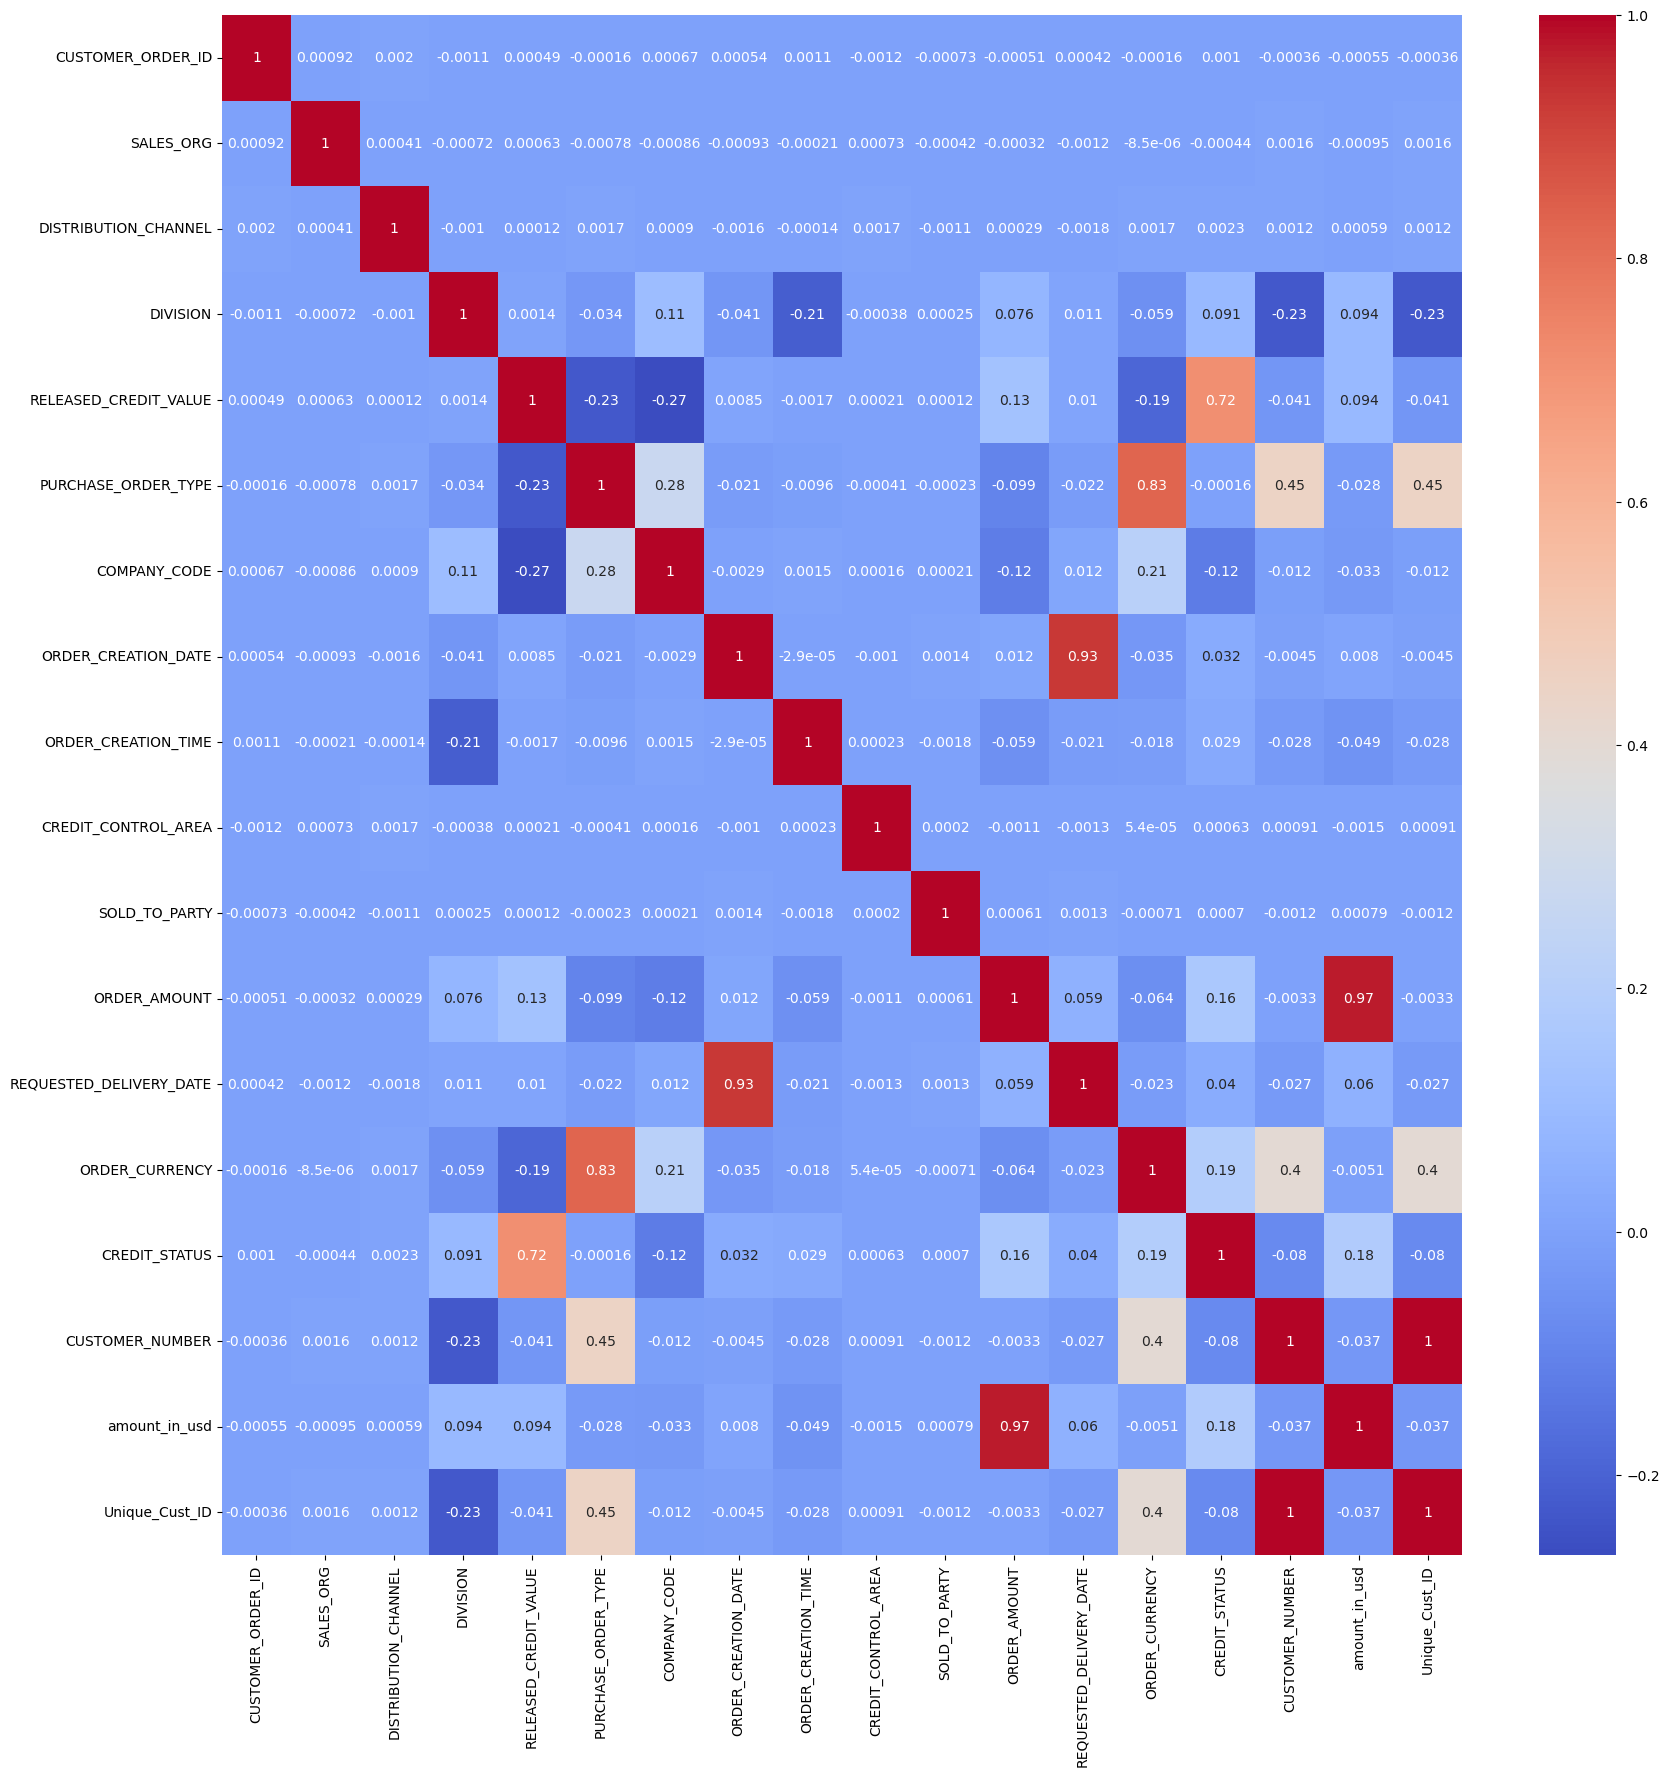

In [22]:
# Q5 Create a heatmap to find correlation between the columns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
#  Q6 Try to identify important or relevant columns for feature extraction
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'), ('ORDER_AMOUNT', 'amount_in_usd'), ('CUSTOMER_NUMBER', 'Unique_Cust_ID')]
